In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
data.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [3]:
#drop the column with all missing values and unnecessary values
data.drop(["Unnamed: 32","id"],inplace=True,axis=1)

In [4]:
data=data.rename(columns= {"diagnosis":"target"})

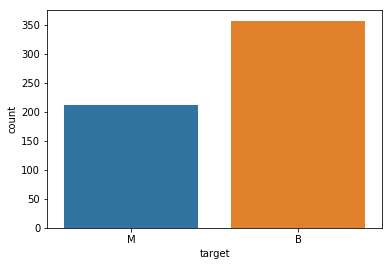

B    357
M    212
Name: target, dtype: int64


In [5]:
sns.countplot(data["target"])
plt.show()
print(data.target.value_counts())

In [6]:
data["target"]=[1 if i.strip()== "M" else 0 for i in data.target]


#bad=1,good=0

In [7]:
print(len(data))

569


In [8]:
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#Count the number of rows and columns in the daha set
print("Data Shape:",data.shape)

Data Shape: (569, 31)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
target                     569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [11]:
#count the number of empty values(NaN, NAN, na) in each column
data.isna().sum()

target                     0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Missing value: none**

In [12]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


EDA

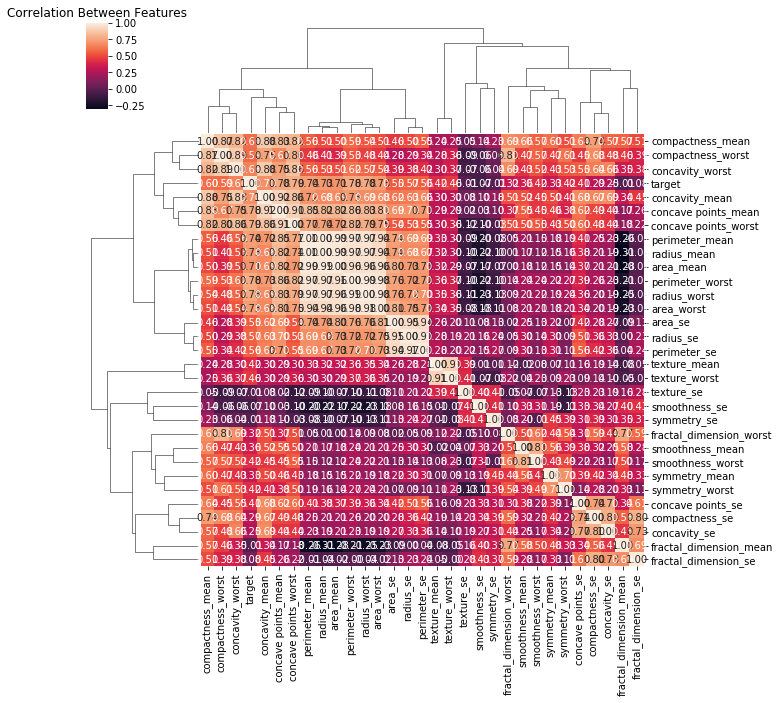

In [13]:
#correlation
corr_matrix=data.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

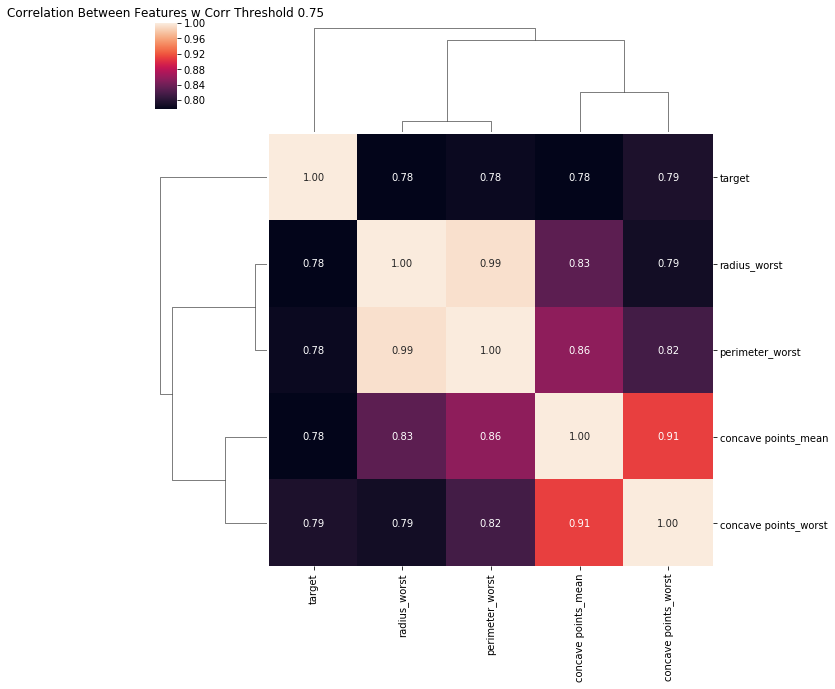

In [14]:
threshold = 0.75
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features =corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(),annot=True,fmt=".2f")
plt.title("Correlation Between Features w Corr Threshold 0.75")
plt.show()


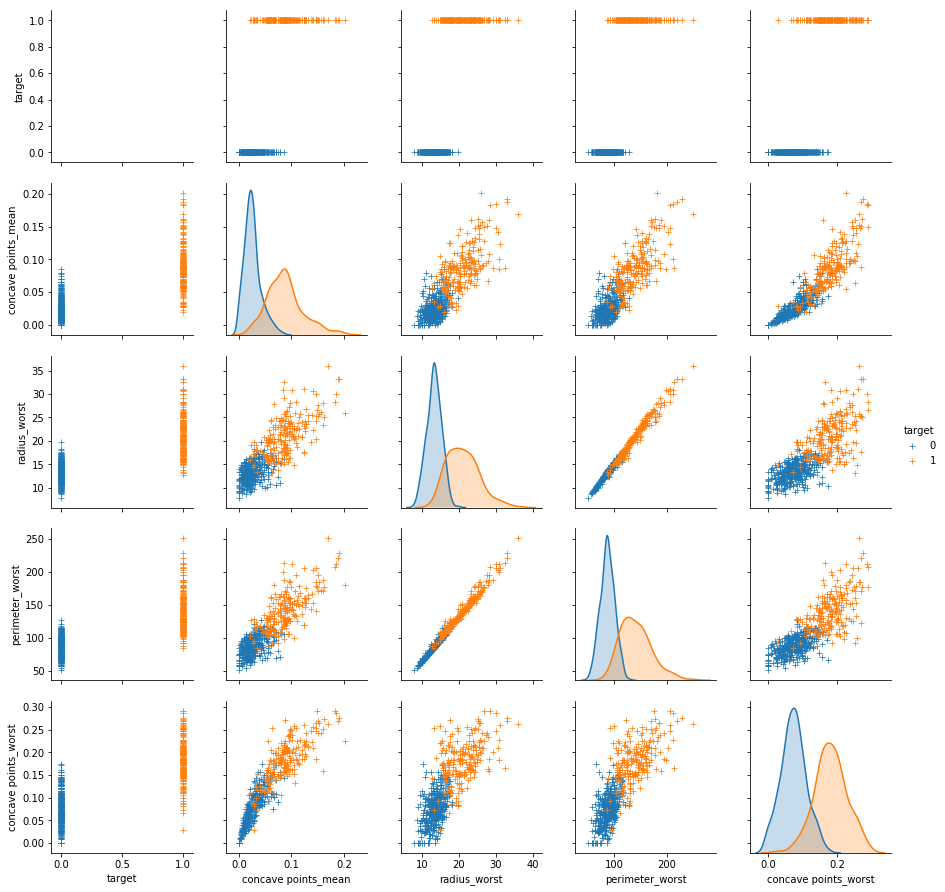

In [15]:
sns.pairplot(data[corr_features],diag_kind="kde",markers ="+",hue="target")
plt.show()

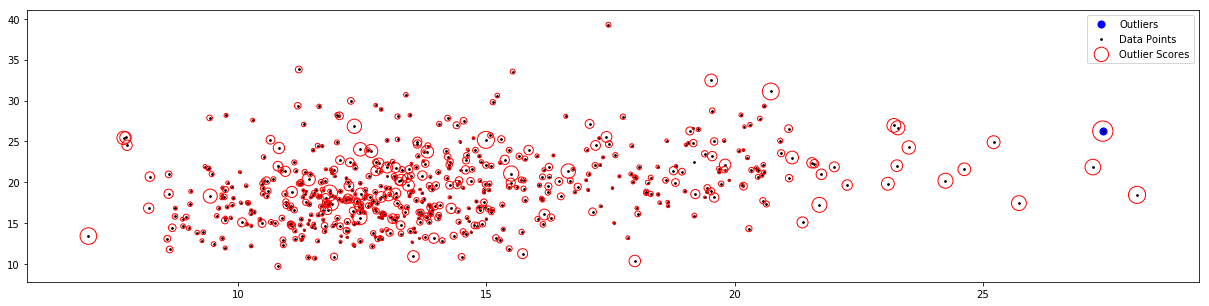

In [16]:
#outlier
y= data.target
x= data.drop(["target"],axis=1)
columns =x.columns.tolist()

clf=LocalOutlierFactor()
y_pred=clf.fit_predict(x)
X_score =clf.negative_outlier_factor_

outlier_score=pd.DataFrame()
outlier_score["score"] = X_score

#threshold
threshold =-2.5
filtre = outlier_score["score"] < threshold
outlier_index=outlier_score[filtre].index.tolist()

plt.figure(figsize=(21,5))
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color="blue",s=50,label="Outliers")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Data Points")

radius = (X_score.max() - X_score)/(X_score.max()-X_score-X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius,edgecolors="r",facecolors="none",label="Outlier Scores")
plt.legend()
plt.show()

In [17]:
#drop outliers
x=x.drop(outlier_index)
y=y.drop(outlier_index).values

In [18]:
#train test split
test_size=0.3
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=test_size,random_state=42)


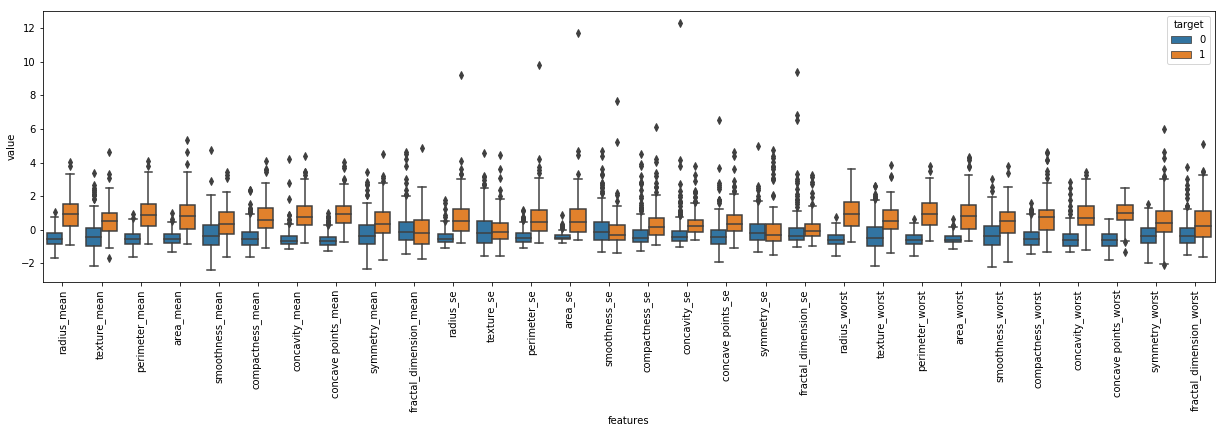

In [19]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train_df=pd.DataFrame(X_train,columns = columns)
X_train_df_describe =X_train_df.describe()
X_train_df["target"] =Y_train

data_melted=pd.melt(X_train_df,id_vars="target",
                   var_name="features",
                   value_name="value")

plt.figure(figsize=(21,5))
sns.boxplot(x="features",y="value",hue="target",data=data_melted)
plt.xticks(rotation=90)
plt.show()

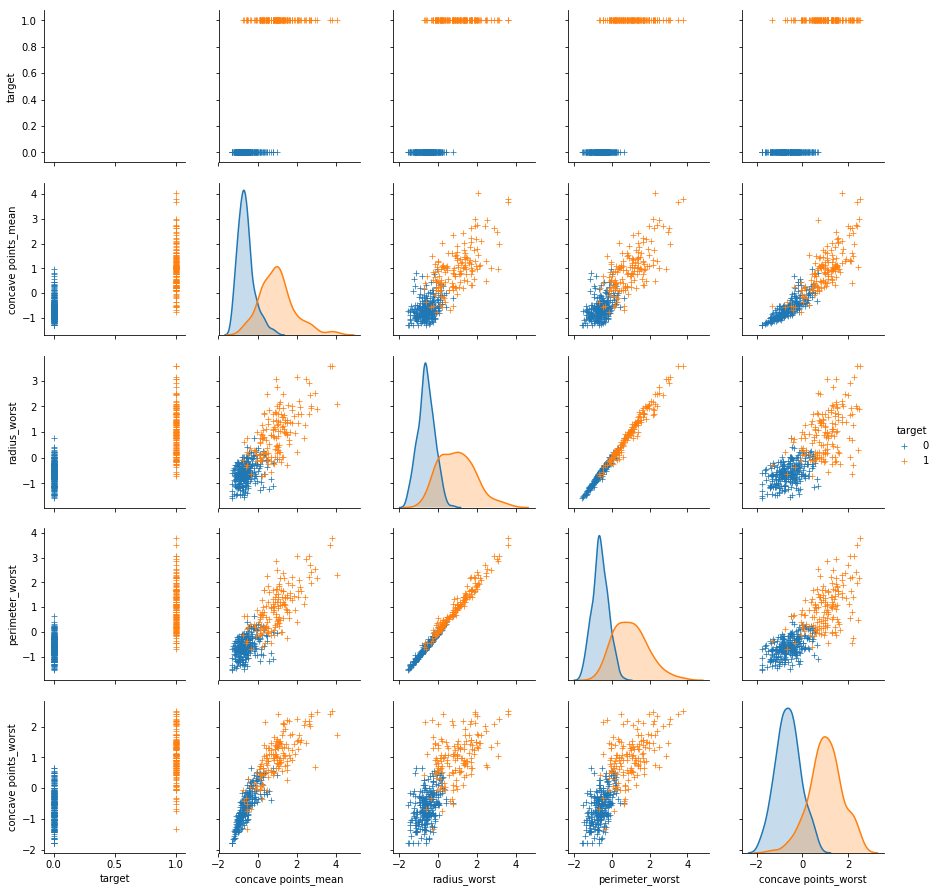

In [20]:
sns.pairplot(X_train_df[corr_features],diag_kind="kde",markers="+",hue="target")
plt.show()

In [21]:
#basic knn method
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
acc=accuracy_score(Y_test,y_pred)
score=knn.score(X_test,Y_test)
print("Score:",score)
print("CM:",cm)

Score: 0.9532163742690059
CM: [[108   1]
 [  7  55]]


In [22]:
#choose best parameters
def KNN_Best_Params(x_train,x_test,y_train,y_test):
    k_range=list(range(1,31))
    weight_options=["uniform","distance"]
    print()
    param_grid=dict(n_neighbors =k_range,weights=weight_options)
    
    knn=KNeighborsClassifier()
    grid=GridSearchCV(knn,param_grid,cv=10,scoring="accuracy")
    grid.fit(x_train,y_train)
    
    print("Best Training Score: {} with parameters: {}".format(grid.best_score_,grid.best_params_))
    print()
    
    knn=KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)
    
    y_pred_test=knn.predict(x_test)
    y_pred_train=knn.predict(x_train)
    
    cm_test=confusion_matrix(y_test,y_pred_test)
    cm_train=confusion_matrix(y_train,y_pred_train)
    
    acc_test=accuracy_score(y_test,y_pred_test)
    acc_train=accuracy_score(y_train,y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test,acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    
    return grid


grid = KNN_Best_Params(X_train,X_test,Y_train,Y_test)


Best Training Score: 0.9672544080604534 with parameters: {'n_neighbors': 4, 'weights': 'uniform'}

Test Score: 0.9590643274853801, Train Score: 0.9773299748110831

CM Test:  [[107   2]
 [  5  57]]
CM Train:  [[248   0]
 [  9 140]]


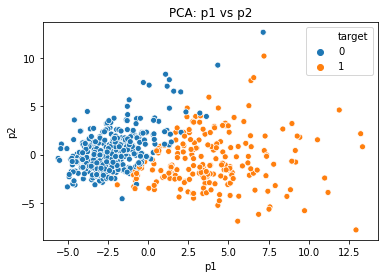

In [23]:
#pca
scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)

pca=PCA(n_components=2)
pca.fit(x_scaled)
X_reduced_pca=pca.transform(x_scaled)
pca_data =pd.DataFrame(X_reduced_pca,columns =["p1","p2"])
pca_data["target"] = y
sns.scatterplot(x="p1",y="p2",hue="target",data=pca_data)
plt.title("PCA: p1 vs p2")
plt.show()

In [24]:
X_train_pca,X_test_pca,Y_train_pca,Y_test_pca=train_test_split(X_reduced_pca,y,test_size=test_size,random_state=42)
grid_pca= KNN_Best_Params(X_train_pca,X_test_pca,Y_train_pca,Y_test_pca)


Best Training Score: 0.9420654911838791 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.9239766081871345, Train Score: 0.947103274559194

CM Test:  [[103   6]
 [  7  55]]
CM Train:  [[241   7]
 [ 14 135]]


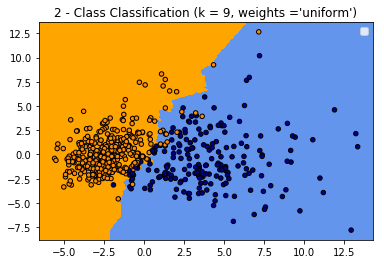

In [25]:
cmap_light =ListedColormap(["orange","cornflowerblue"])
cmap_bold=ListedColormap(["darkorange","darkblue"])

h=.05
X=X_reduced_pca
x_min,x_max=X[:,0].min()-1,X[:,0].max() + 1
y_min,y_max =X[:,1].min() - 1,X[:,1].max() + 1
xx,yy =np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))
Z=grid_pca.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,
           edgecolor="k",s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("%i - Class Classification (k = %i, weights ='%s')"
        %(len(np.unique(y)),grid_pca.best_estimator_.n_neighbors,grid_pca.best_estimator_.weights))
plt.legend()
plt.show()

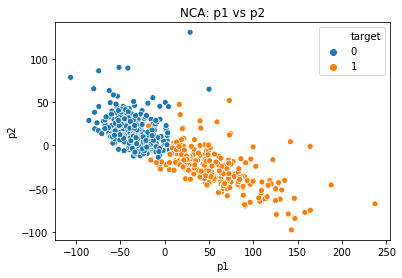

In [26]:
nca=NeighborhoodComponentsAnalysis(n_components=2,random_state=42)
nca.fit(x_scaled,y)
X_reduced_nca=nca.transform(x_scaled)

nca_data=pd.DataFrame(X_reduced_nca,columns=["p1","p2"])
nca_data["target"]=y
sns.scatterplot(x="p1",y="p2",hue="target",data=nca_data)
plt.title("NCA: p1 vs p2")
plt.show()


Best Training Score: 0.9874055415617129 with parameters: {'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.9941520467836257, Train Score: 1.0

CM Test:  [[108   1]
 [  0  62]]
CM Train:  [[248   0]
 [  0 149]]


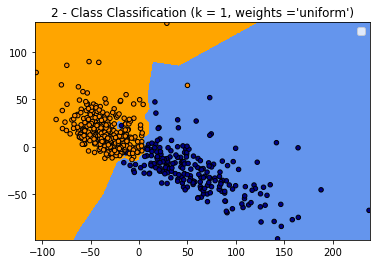

In [27]:
X_train_nca,X_test_nca,Y_train_nca,Y_test_nca=train_test_split(X_reduced_nca,y,test_size=test_size,random_state=42)
grid_nca= KNN_Best_Params(X_train_nca,X_test_nca,Y_train_nca,Y_test_nca)

cmap_light =ListedColormap(["orange","cornflowerblue"])
cmap_bold=ListedColormap(["darkorange","darkblue"])

h=.2
X=X_reduced_nca
x_min,x_max=X[:,0].min()-1,X[:,0].max() + 1
y_min,y_max =X[:,1].min() - 1,X[:,1].max() + 1
xx,yy =np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))
Z=grid_nca.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,
           edgecolor="k",s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("%i - Class Classification (k = %i, weights ='%s')"
        %(len(np.unique(y)),grid_nca.best_estimator_.n_neighbors,grid_nca.best_estimator_.weights))
plt.legend()
plt.show()